In [1]:
from Dataset import Dataset
from conditonalDCGAN import ConditionalGenerator, ConditionalDiscriminator
from DCGAN import Generator, Discriminator
from model_wrapper import Trainer
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import os
import shutil


In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
GAN_LOGS = os.path.join(os.getcwd(), "tboard_logs", "gan")
if not os.path.exists(GAN_LOGS):
    os.makedirs(GAN_LOGS)

shutil.rmtree(GAN_LOGS)
writer = SummaryWriter(GAN_LOGS)


# Create a dataset and a DataLoader
transforms = {'val':transforms.Compose([
    transforms.Resize([32, 32]),  # Resize the image first
    transforms.ToTensor(),        # Convert PIL image to tensor
]),
'train':transforms.Compose([
    transforms.Resize([32, 32]),  # Resize the image first
    transforms.RandomHorizontalFlip(p=0.5),       # Random horizontal flip
    transforms.ToTensor(),        # Convert PIL image to tensor
])
}

In [4]:
root_dir = "/home/user/zafara1/Cuda_Vision_Lab-/Session5/Solution/data/afhq"

# Initialize dataset
train_dataset = Dataset(root_dir=root_dir, split="train", transform=transforms["train"])
# test_dataset = Dataset(root_dir=root_dir, split="val", transform=transforms["val"])


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=8,pin_memory=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False,num_workers=8,pin_memory=True)
# print("test_dataset per epoch",next(iter(test_loader))[0].size())


## DCGAN training

In [5]:
# Initialize models, loss function, and optimizers
generator = Generator(latent_dim=128, num_channels=3, base_channels=32)
discriminator = Discriminator(in_channels=3, out_dim=1, base_channels=32)


optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [10]:
trainer = Trainer(generator=generator, discriminator=discriminator, latent_dim=128, conditional_gan=False, writer=writer)

  0%|          | 0/229 [00:00<?, ?it/s]

Epoch 1 Iter 228: D_Loss=0.32436, G_Loss=7.99017): 100%|██████████| 229/229 [00:07<00:00, 30.71it/s] 
Epoch 2 Iter 457: D_Loss=0.82359, G_Loss=2.55844): 100%|██████████| 229/229 [00:06<00:00, 33.96it/s] 
Epoch 3 Iter 686: D_Loss=1.17274, G_Loss=7.98884): 100%|██████████| 229/229 [00:06<00:00, 36.47it/s] 
Epoch 4 Iter 915: D_Loss=0.3848, G_Loss=6.73829): 100%|██████████| 229/229 [00:06<00:00, 33.60it/s]  
Epoch 5 Iter 1144: D_Loss=0.10769, G_Loss=8.52125): 100%|██████████| 229/229 [00:06<00:00, 34.83it/s] 
Epoch 6 Iter 1373: D_Loss=0.33656, G_Loss=9.6816): 100%|██████████| 229/229 [00:06<00:00, 35.75it/s]  
Epoch 7 Iter 1602: D_Loss=0.9012, G_Loss=4.83215): 100%|██████████| 229/229 [00:06<00:00, 33.82it/s]  
Epoch 8 Iter 1831: D_Loss=0.40492, G_Loss=5.05223): 100%|██████████| 229/229 [00:06<00:00, 35.96it/s] 
Epoch 9 Iter 2060: D_Loss=0.15135, G_Loss=9.35233): 100%|██████████| 229/229 [00:06<00:00, 35.87it/s] 
Epoch 10 Iter 2289: D_Loss=1.62866, G_Loss=7.47619): 100%|██████████| 229/229

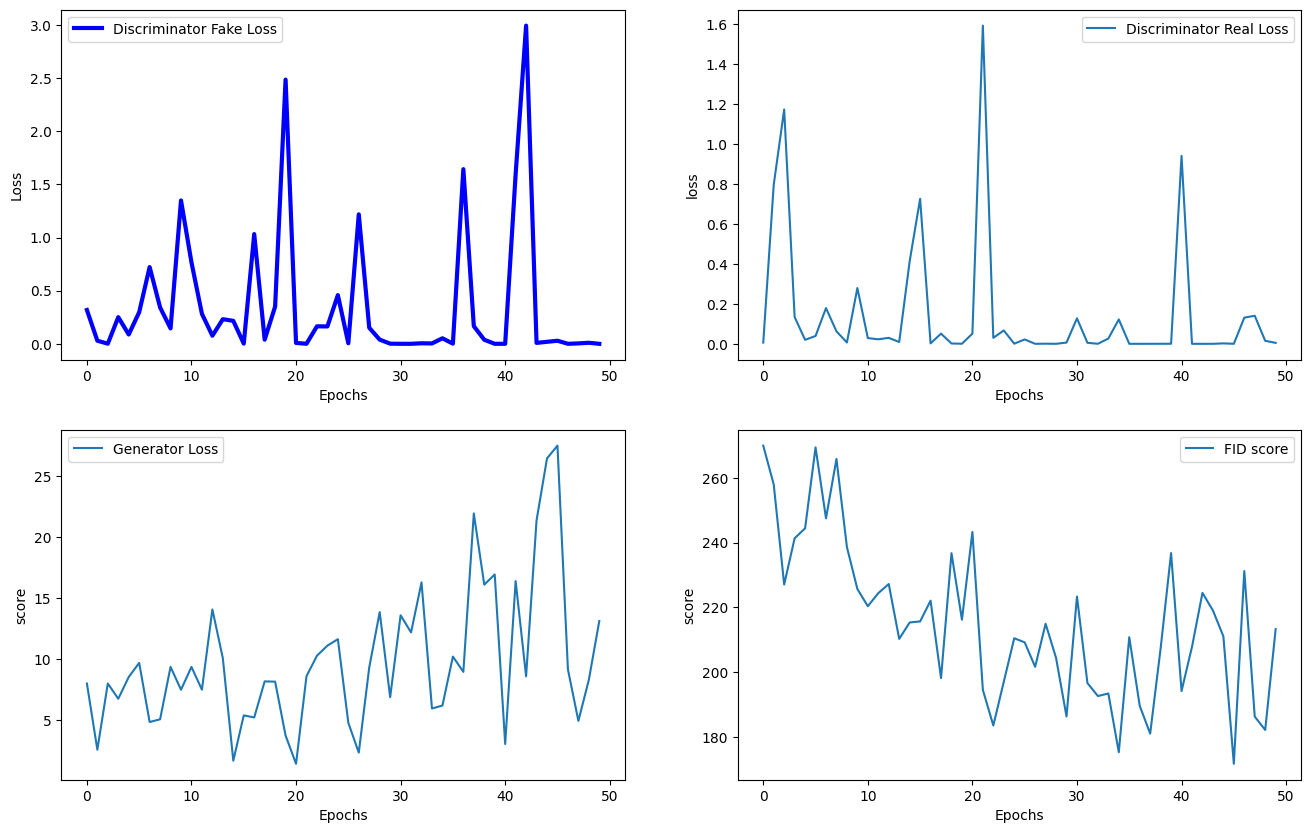

In [11]:
trainer.train(data_loader=train_loader)

## Conditional DCGAN training

In [10]:
# Initialize models, loss function, and optimizers
conditional_generator = ConditionalGenerator(latent_dim=128, num_channels=3, base_channels=32, num_classes=3)
conditional_discriminator = ConditionalDiscriminator(in_channels=3, out_dim=1, base_channels=32, num_classes=3)

optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [11]:
conditionaltrainer = Trainer(generator=conditional_generator, discriminator=conditional_discriminator, latent_dim=128, conditional_gan=True,writer=writer)

In [12]:
conditionaltrainer.train(data_loader=train_loader)

  0%|          | 0/229 [00:00<?, ?it/s]

Epoch 1 Iter 7: D_Loss=0.36199, G_Loss=2.2472):   3%|▎         | 7/229 [00:11<06:00,  1.62s/it] 


KeyboardInterrupt: 